In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importacion (Gasolina superior, Gasolina regular, Diesel)

In [31]:
file_path = "./data/CSV/importacion.csv"
df = pd.read_csv(file_path)

In [34]:
df = df[pd.to_datetime(df['Fecha'], errors='coerce').notna()]
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Preprocessing para diesel alto azufre
serie_diesel = df[['Fecha', 'Diesel alto azufre']].copy()
serie_diesel.rename(columns={'Diesel alto azufre': 'Diesel'}, inplace=True)

serie_gasolina_regular = df[['Fecha', 'Gasolina regular']].set_index('Fecha')
serie_gasolina_regular = serie_gasolina_regular.asfreq('MS')  # Frecuencia mensual

serie_gasolina_superior = df[['Fecha', 'Gasolina superior']].set_index('Fecha')
serie_gasolina_superior = serie_gasolina_superior.asfreq('MS')  # Frecuencia mensual

serie_diesel.set_index('Fecha', inplace=True)
serie_diesel = serie_diesel.asfreq('MS')


In [35]:
print("Gasolina Regular: \n")
print("Inicio:", serie_gasolina_regular.index.min())
print("Fin:", serie_gasolina_regular.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_regular.index))

print("\nGasolina Superior: \n")
print("Inicio:", serie_gasolina_superior.index.min())
print("Fin:", serie_gasolina_superior.index.max())
print("Frecuencia:", pd.infer_freq(serie_gasolina_superior.index))

print("\nDiesel: \n")
print("Inicio:", serie_diesel.index.min())
print("Fin:", serie_diesel.index.max())
print("Frecuencia:", pd.infer_freq(serie_diesel.index))

Gasolina Regular: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Gasolina Superior: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS

Diesel: 

Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Frecuencia: MS


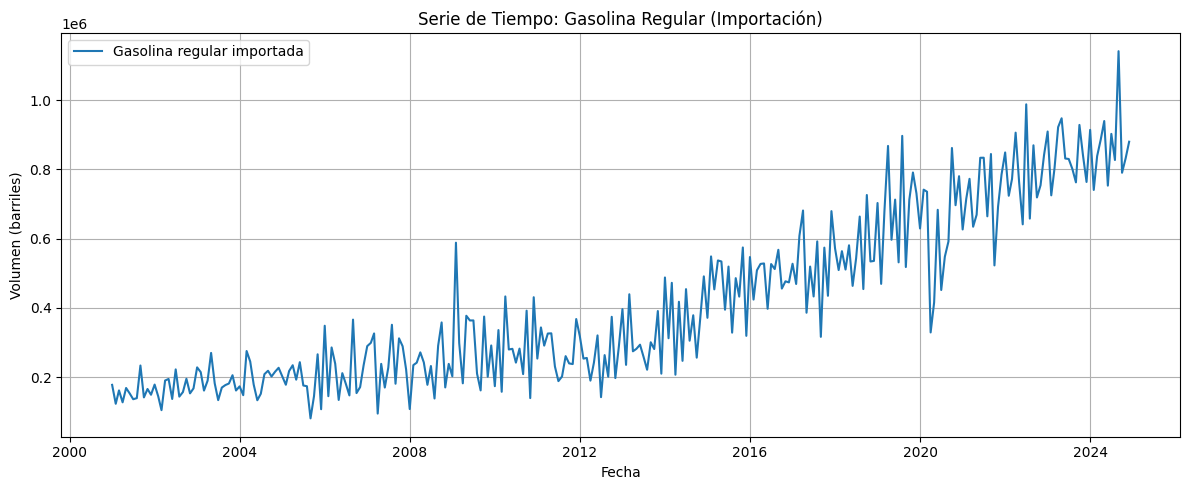

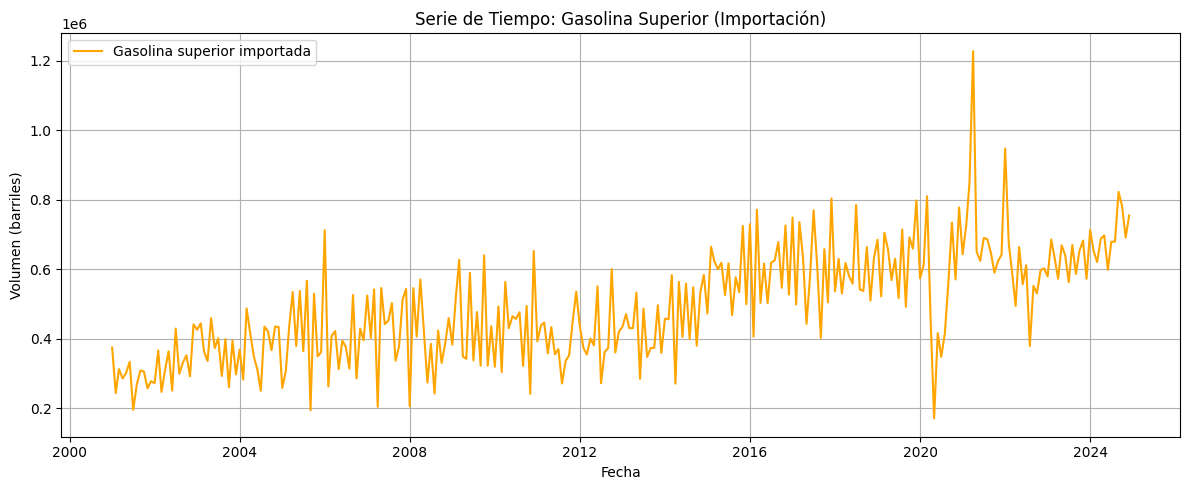

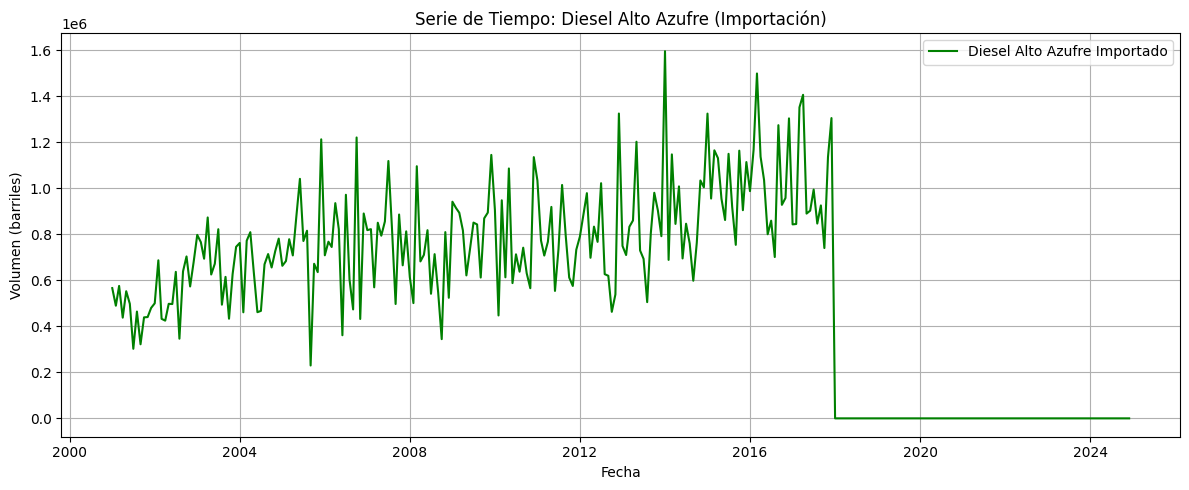

In [36]:
# === Gráfico de la serie Gasolina regular Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_regular, label='Gasolina regular importada')
plt.title('Serie de Tiempo: Gasolina Regular (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Gasolina superior Importada===
plt.figure(figsize=(12, 5))
plt.plot(serie_gasolina_superior, label='Gasolina superior importada', color='orange')
plt.title('Serie de Tiempo: Gasolina Superior (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# === Gráfico de la serie Diesel ===
plt.figure(figsize=(12, 5))
plt.plot(serie_diesel, label='Diesel Alto Azufre Importado', color='green')
plt.title('Serie de Tiempo: Diesel Alto Azufre (Importación)')
plt.xlabel('Fecha')
plt.ylabel('Volumen (barriles)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
